In [23]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.linear_model import LinearRegression

In [24]:
x = np.array([i*np.pi/180 for i in range (60, 300, 4)])
x[0:10]

array([1.04719755, 1.11701072, 1.18682389, 1.25663706, 1.32645023,
       1.3962634 , 1.46607657, 1.53588974, 1.60570291, 1.67551608])

In [25]:
np.random.seed(10)
y = np.sin(x) + np.random.normal(0, 0.15, len(x))
y[0:10]

array([1.06576338, 1.00608589, 0.69537381, 0.94979894, 1.06349612,
       0.87679492, 1.03434863, 1.01567311, 1.00003454, 0.96833186])

In [26]:
data = pd.DataFrame(np.column_stack([x, y]), columns=["x", "y"])
data[0:10]

,x,y
0,1.047198,1.065763
1,1.117011,1.006086
2,1.186824,0.695374
3,1.256637,0.949799
4,1.326450,1.063496
5,1.396263,0.876795
6,1.466077,1.034349
7,1.535890,1.015673
8,1.605703,1.000035
9,1.675516,0.968332


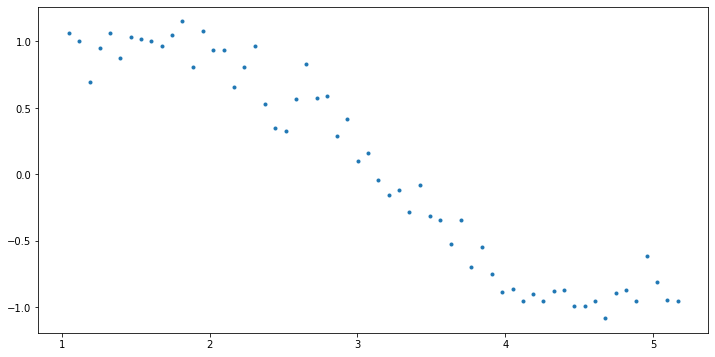

In [55]:
rcParams["figure.figsize"] = 12, 6
plt.plot(data["x"], data["y"], ".")


In [43]:
# % : String formating
for i in range(2,16): 
    col = "x_%d"%i
    data[col] = data["x"]**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

                rss intercept coef_x_1 coef_x_2 coef_x_3 coef_x_4 coef_x_5  \
model_power_1   3.3         2    -0.62      NaN      NaN      NaN      NaN   
model_power_2   3.3       1.9    -0.58   -0.006      NaN      NaN      NaN   
model_power_3   1.1      -1.1        3     -1.3     0.14      NaN      NaN   
model_power_4   1.1     -0.27      1.7    -0.53   -0.036    0.014      NaN   
model_power_5     1         3     -5.1      4.7     -1.9     0.33   -0.021   
model_power_6  0.99      -2.8      9.5     -9.7      5.2     -1.6     0.23   
model_power_7  0.93        19      -56       69      -45       17     -3.5   
model_power_8  0.92        43 -1.4e+02  1.8e+02 -1.3e+02       58      -15   
model_power_9  0.87   1.7e+02 -6.1e+02  9.6e+02 -8.5e+02  4.6e+02 -1.6e+02   
model_power_10 0.87   1.4e+02 -4.9e+02  7.3e+02   -6e+02  2.9e+02      -87   
model_power_11 0.87       -75  5.1e+02 -1.3e+03  1.9e+03 -1.6e+03  9.1e+02   
model_power_12 0.87  -3.4e+02  1.9e+03 -4.4e+03    6e+03 -5.2e+0

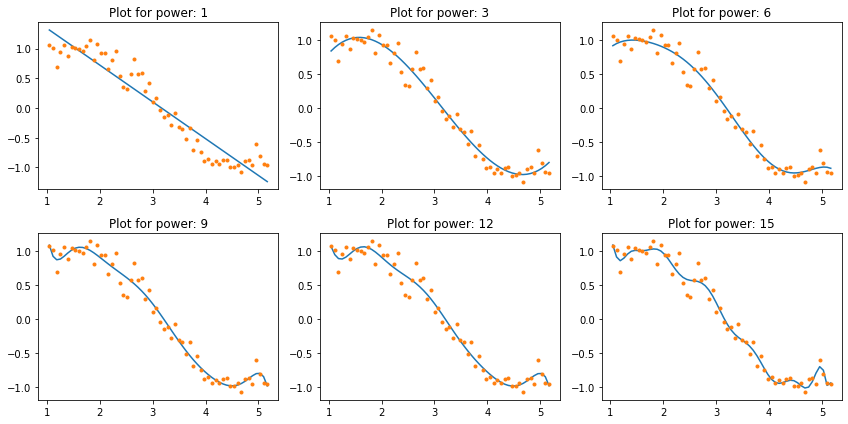

In [78]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #inp
    inp=['x']
    if power>=2:
        inp.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    reg = LinearRegression(normalize=True)
    reg.fit(data[inp],data['y'])
    pred = reg.predict(data[inp])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'], pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    residual_sum_of_squares = sum((pred-data['y'])**2)
    rss = [residual_sum_of_squares]
    rss.extend([reg.intercept_])
    rss.extend(reg.coef_)
    return rss


#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_power_%d'%i for i in range(1,16)]
matrix = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    matrix.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)
    
    
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
print(matrix)

/home/hasan/code/jupyterenvironment/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.81609e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
1e-15,0.87,94,-3e+02,3.8e+02,-2.4e+02,68,-1.2,-3.7,0.3,0.19,-0.021,-0.0077,0.0011,0.00025,-6.3e-05,4.6e-06,-9e-08
1e-10,0.92,11,-29,31,-15,2.9,0.17,-0.091,-0.011,0.002,0.00064,2.4e-05,-2e-05,-4.2e-06,2.2e-07,2.3e-07,-2.3e-08
1e-08,0.95,1.3,-1.5,1.7,-0.68,0.039,0.016,0.00016,-0.00036,-5.4e-05,-2.9e-07,1.1e-06,1.9e-07,2e-08,3.9e-09,8.2e-10,-4.6e-10
0.0001,0.96,0.56,0.55,-0.13,-0.026,-0.0028,-0.00011,4.1e-05,1.5e-05,3.7e-06,7.4e-07,1.3e-07,1.9e-08,1.9e-09,-1.3e-10,-1.5e-10,-6.2e-11
0.001,1,0.82,0.31,-0.087,-0.02,-0.0028,-0.00022,1.8e-05,1.2e-05,3.4e-06,7.3e-07,1.3e-07,1.9e-08,1.7e-09,-1.5e-10,-1.4e-10,-5.2e-11
0.01,1.4,1.3,-0.088,-0.052,-0.01,-0.0014,-0.00013,7.2e-07,4.1e-06,1.3e-06,3e-07,5.6e-08,9e-09,1.1e-09,4.3e-11,-3.1e-11,-1.5e-11
1,5.6,0.97,-0.14,-0.019,-0.003,-0.00047,-7e-05,-9.9e-06,-1.3e-06,-1.4e-07,-9.3e-09,1.3e-09,7.8e-10,2.4e-10,6.2e-11,1.4e-11,3.2e-12
5,14,0.55,-0.059,-0.0085,-0.0014,-0.00024,-4.1e-05,-6.9e-06,-1.1e-06,-1.9e-07,-3.1e-08,-5.1e-09,-8.2e-10,-1.3e-10,-2e-11,-3e-12,-4.2e-13
10,18,0.4,-0.037,-0.0055,-0.00095,-0.00017,-3e-05,-5.2e-06,-9.2e-07,-1.6e-07,-2.9e-08,-5.1e-09,-9.1e-10,-1.6e-10,-2.9e-11,-5.1e-12,-9.1e-13
20,23,0.28,-0.022,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.6e-07,-1.2e-07,-2.2e-08,-4e-09,-7.5e-10,-1.4e-10,-2.5e-11,-4.7e-12,-8.7e-13


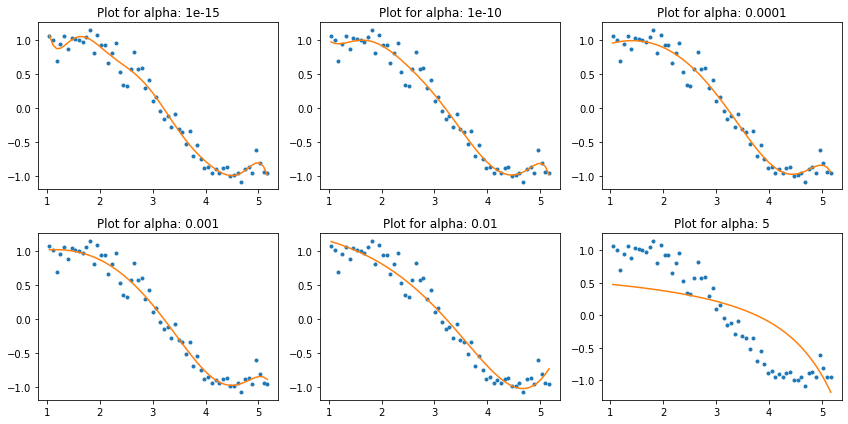

In [81]:
# Ridge Regression
from sklearn.linear_model import Ridge
def ridge_reg(data, inp, alpha, models_to_plot={}):
    ridgereg = Ridge(alpha=alpha, normalize=True)
    ridgereg.fit(data[inp], data["y"])
    pred = ridgereg.predict(data[inp])

    # plot
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data["x"], data["y"],".")
        plt.plot(data['x'], pred)
        plt.title("Plot for alpha: %.3g"%alpha)
        
        
    residual_sum_of_squares = sum((pred-data['y'])**2)
    rss = [residual_sum_of_squares]
    rss.extend([ridgereg.intercept_])
    rss.extend(ridgereg.coef_)
    return rss
    
inp = ["x"]
inp.extend(["x_%d"%i for i in range(2,16)])
    
# different alpha values and test
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

# Dataframe for coefs
indeks = [alpha_ridge[i] for i in range(0,10)]
matrix_ridge = pd.DataFrame(index=indeks, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

for i in range(10):
    matrix_ridge.iloc[i,] = ridge_reg(data, inp, alpha_ridge[i], models_to_plot)

matrix_ridge